# libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# import dataset

In [6]:
df=pd.read_csv("OrangeData.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# remove non informative columns

In [7]:
df.drop('customerID', axis=1, inplace=True)

# convert total charges

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].dtypes

dtype('float64')

# check for missing values

In [9]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# remove missing values 


In [10]:
df = df.dropna()
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# convert variables

In [11]:
df=pd.get_dummies(df, columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'],dummy_na=False,drop_first=True)
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,0,1,1,0,1,0,0,1,0
7039,0,72,103.20,7362.90,0,1,1,1,0,1,...,1,0,1,1,0,1,1,0,0,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
7041,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,1


# split dataset in features and target variable


In [12]:
feature_cols = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges','gender_Male','Partner_Yes','Dependents_Yes','PhoneService_Yes','MultipleLines_No phone service','MultipleLines_Yes','InternetService_Fiber optic','InternetService_No','OnlineSecurity_No internet service','OnlineSecurity_Yes','OnlineBackup_No internet service',
                                          'OnlineBackup_Yes','DeviceProtection_No internet service','DeviceProtection_Yes','TechSupport_No internet service','TechSupport_Yes','StreamingTV_No internet service','StreamingTV_Yes','StreamingMovies_No internet service','StreamingMovies_Yes','Contract_One year','Contract_Two year','PaperlessBilling_Yes','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check']
X = df[feature_cols] 
y = df.Churn_Yes

# Split dataset into training set and test set


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4533,0,71,105.15,7555.00,0,1,0,1,0,1,...,0,1,0,1,0,1,1,0,0,0
5074,0,49,19.45,921.30,0,0,1,1,0,0,...,1,0,1,0,1,0,0,1,0,0
2693,0,72,19.30,1414.80,1,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0
6095,0,4,19.65,67.55,1,0,0,1,0,0,...,1,0,1,0,0,0,1,0,0,1
4552,0,9,20.45,147.55,0,0,0,1,0,0,...,1,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0,19,65.35,1231.85,1,0,0,1,0,0,...,0,0,0,1,1,0,1,0,0,0
5200,0,70,106.50,7397.00,0,1,1,1,0,1,...,0,1,0,1,1,0,1,0,1,0
3987,0,11,76.50,837.95,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
235,0,2,54.40,114.10,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


# building a decision tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

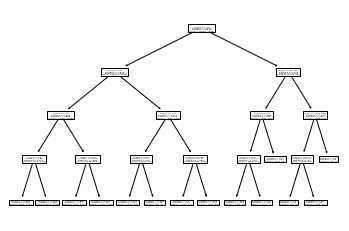

In [15]:
from sklearn import tree

tree.plot_tree(tree_model)
plt.savefig('tree_model.png')
#plt.show() an option

# prediction

In [16]:
y_pred = tree_model.predict(X_test)

# accuracy, sensitivity and specificity 

In [17]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7940841865756542


In [18]:
def calculate_sensitivity_specificity(y_test, y_pred_test):
   
    # Get true/false if a breach occurred
    actual_pos = y_test == 1
    actual_neg = y_test == 0
    
    # true test match actual, false tests different from actual
    true_pos = (y_pred == 1) & (actual_pos)
    false_pos = (y_pred == 1) & (actual_neg)
    true_neg = (y_pred == 0) & (actual_neg)
    false_neg = (y_pred == 0) & (actual_pos)
    

    # sensitivity and specificity calculation 
    sensitivity = np.sum(true_pos) / np.sum(actual_pos)
    specificity = np.sum(true_neg) / np.sum(actual_neg)
    
    return sensitivity, specificity

In [19]:
# show the calculation results 
sensitivity, specificity = calculate_sensitivity_specificity(y_test, y_pred)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)


Sensitivity: 0.39655172413793105
Specificity: 0.9366306027820711


In [20]:
conda install graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [22]:
conda install pydotplus

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\steve\Anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydotplus-2.0.2            |             py_3          23 KB
    ------------------------------------------------------------
                                           Total:          23 KB

The following packages will be UPDATED:

  pydotplus          pkgs/main/win-64::pydotplus-2.0.2-py3~ --> pkgs/main/noarch::pydotplus-2.0.2-py_3




pydotplus-2.0.2      | 23 KB     |            |   0% 
pydotplus-2.0.2      | 23 KB     | ######8    |  68% 
pydotplus-2.0.2      | 23 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [23]:
import pydotplus
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

!set PATH=PATH;C:\Users\steve\Anaconda3\Library\bin\graphviz

dot_data = export_graphviz(tree_model,
                           filled=True, 
                           rounded=True,
                           class_names=['Churn', 
                                        'Not Churn'],
                           feature_names=['SeniorCitizen','tenure','MonthlyCharges','TotalCharges','gender_Male','Partner_Yes','Dependents_Yes','PhoneService_Yes','MultipleLines_No phone service','MultipleLines_Yes','InternetService_Fiber optic','InternetService_No','OnlineSecurity_No internet service','OnlineSecurity_Yes','OnlineBackup_No internet service',
                                          'OnlineBackup_Yes','DeviceProtection_No internet service','DeviceProtection_Yes','TechSupport_No internet service','TechSupport_Yes','StreamingTV_No internet service','StreamingTV_Yes','StreamingMovies_No internet service','StreamingMovies_Yes','Contract_One year','Contract_Two year','PaperlessBilling_Yes','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check'],
                          out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png')

True

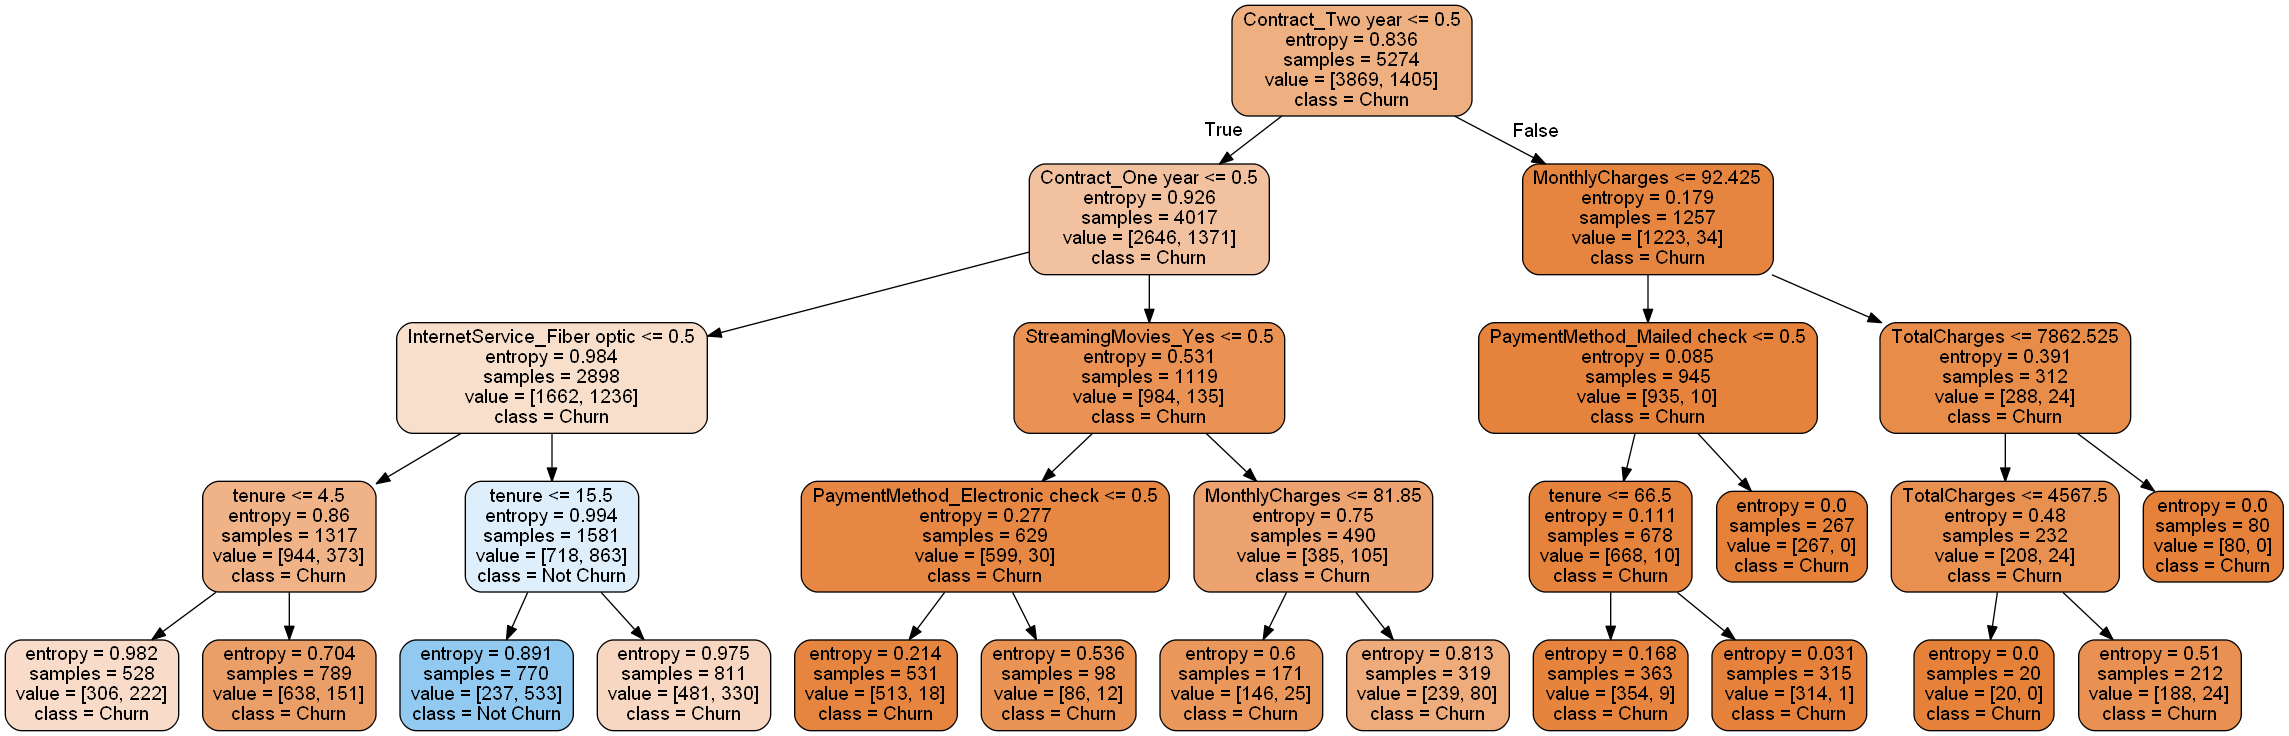

In [24]:
from IPython.display import Image
Image (filename='tree.png',width=1000)

# association rule 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
SeniorCitizen                            7032 non-null int64
tenure                                   7032 non-null int64
MonthlyCharges                           7032 non-null float64
TotalCharges                             7032 non-null float64
gender_Male                              7032 non-null uint8
Partner_Yes                              7032 non-null uint8
Dependents_Yes                           7032 non-null uint8
PhoneService_Yes                         7032 non-null uint8
MultipleLines_No phone service           7032 non-null uint8
MultipleLines_Yes                        7032 non-null uint8
InternetService_Fiber optic              7032 non-null uint8
InternetService_No                       7032 non-null uint8
OnlineSecurity_No internet service       7032 non-null uint8
OnlineSecurity_Yes                       7032 non-null uint8
OnlineBackup_No internet service   

In [26]:
for i in range(len(df)):
    if df['Contract_One year'].iloc[i]==0:
        if df['OnlineSecurity_Yes'].iloc[i]==0:
            if (df['tenure'].iloc[i]<=6.5):
                df['MonthlyCharges'].iloc[i]='group0'
                df['tenure'].iloc[i]='group0'
                df['TotalCharges'].iloc[i]='group0'
            else:
                df['tenure'].iloc[i]='group1'
        elif df['MonthlyCharges'].iloc[i]<=1179:
            df['MonthlyCharges'].iloc[i]='group1'
            df['tenure'].iloc[i]='group1'
            df['TotalCharges'].iloc[i]='group1'
        elif df['tenure'].iloc[i]>28.5:
            df['MonthlyCharges'].iloc[i]='group1'
            df['tenure'].iloc[i]='group1'
            df['TotalCharges'].iloc[i]='group1'
        else:
            df['MonthlyCharges'].iloc[i]='group0'
            df['tenure'].iloc[i]='group0'
            df['TotalCharges'].iloc[i]='group0'
    else:
        df['MonthlyCharges'].iloc[i]='group1'
        df['tenure'].iloc[i]='group1'
        df['TotalCharges'].iloc[i]='group1'

C:\Users\steve\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
SeniorCitizen                            7032 non-null int64
tenure                                   7032 non-null object
MonthlyCharges                           7032 non-null object
TotalCharges                             7032 non-null object
gender_Male                              7032 non-null uint8
Partner_Yes                              7032 non-null uint8
Dependents_Yes                           7032 non-null uint8
PhoneService_Yes                         7032 non-null uint8
MultipleLines_No phone service           7032 non-null uint8
MultipleLines_Yes                        7032 non-null uint8
InternetService_Fiber optic              7032 non-null uint8
InternetService_No                       7032 non-null uint8
OnlineSecurity_No internet service       7032 non-null uint8
OnlineSecurity_Yes                       7032 non-null uint8
OnlineBackup_No internet service    